<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-10-07 18:30:36
-------------------
qualified stocks: 87
with latest results: 27
still star stocks: 16
-------------------
Initial Investment:  1.24 C
CY Investment:  1.51 C
Reserve:  57.44 K
Current:  1.41 C
-------------------
Today PnL: -5.39 K (-0.04%)
Current PnL: -20.52 L (-13.62%)
CY Booked + Current PnL: -9.08 L (-6.03%)
-------------------
Total profit:  1.41 L
Total loss:  -21.93 L
-------------------
Total Booked + Current PnL: 17.90 L (14.47%)
Total Booked PnL: 38.42 L (31.06%)
Curr Year Booked PnL: 11.44 L (8.11%)
Prev Year Booked PnL: 26.98 L (21.81%)
Est FTT:  2.29 C
Est FTT PnL: 88.03 L (62.4%)
Deployed:  1.24 C
Current:  1.41 C
CAGR/XIRR %: 7.97%


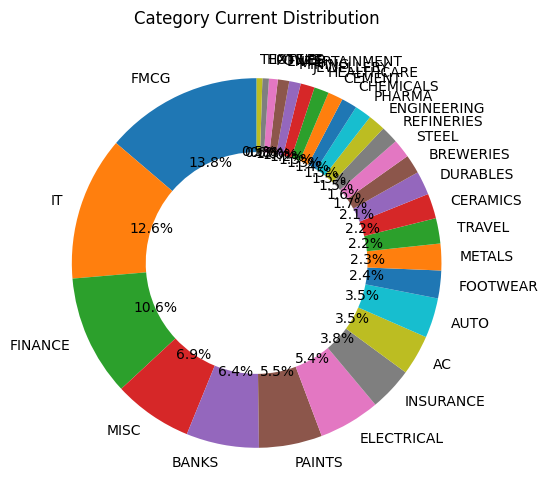

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
50,NATIONALUM,189.63,244.55,-41.67,13.72,H-MC,63.0,115047.0,14543.0,14565.0,...,14.47,12.66,28.96,79.0,1.00,0.82,53.35,MH,METALS,ATH
14,BLUESTARCO,1646.70,2080.00,10.70,2.98,X-MC,52.0,191220.0,26550.0,16789.0,...,16.12,8.78,26.31,89.0,1.58,1.36,25.39,X40N,AC,NTT
77,TTKPRESTIG,769.29,770.00,93.60,1.35,M-SC,39.0,83368.0,-17409.0,17499.0,...,-17.27,20.99,0.09,245.0,-0.99,0.59,9.53,OX40N,DURABLES,NTT
19,CIPLA,1492.70,1662.74,-22.10,3.91,X-LC,43.0,207322.0,2822.0,20483.0,...,1.38,9.88,11.39,10.0,0.14,1.48,10.46,X40N,PHARMA,ATH
57,RELIANCE,1348.50,1533.00,-13.57,3.33,X-LC,51.0,216029.0,5663.0,23115.0,...,2.69,10.70,13.68,37.0,0.24,1.54,19.66,XY25,REFINERIES,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,ACC,2379.51,3906.00,-37.64,4.12,X-MC,54.0,185760.0,-52191.0,204838.0,...,-21.93,110.27,64.15,174.0,-0.25,1.32,4.20,XY24,CEMENT,BTT
8,AWL,315.97,485.00,-64.18,2.79,X-SC,55.0,253171.0,-48580.0,210005.0,...,-16.10,82.95,53.50,116.0,-0.23,1.80,12.45,XY24,FMCG,NTT
58,REPCOHOME,463.60,880.00,-58.27,3.32,H-SC,61.0,237528.0,-48977.0,306316.0,...,-17.09,128.96,89.82,134.0,-0.16,1.69,25.67,XY24,FINANCE,NTT
10,BANDHANBNK,207.88,400.00,-11.46,3.08,H-SC,51.0,220390.0,-58169.0,315621.0,...,-20.88,143.21,92.42,151.0,-0.18,1.57,27.37,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.04,7.52,H-LC,49.0,250536.0,-11083.0,130304.0,...,-4.24,52.01,45.57,7.0,-0.09,1.78,6.61,AR,ELECTRICAL,NTT
2,ACC,2379.51,3906.00,-37.64,4.12,X-MC,54.0,185760.0,-52191.0,204838.0,...,-21.93,110.27,64.15,174.0,-0.25,1.32,4.20,XY24,CEMENT,BTT
4,ANGELONE,2329.34,3033.00,4.03,11.33,X-SC,48.0,184541.0,-6465.0,64165.0,...,-3.38,34.77,30.21,157.0,-0.10,1.31,16.79,X40N,FINANCE,NTT
5,ASIANPAINT,2861.00,3465.66,-17.94,5.77,X-LC,33.0,207046.0,-44722.0,97933.0,...,-17.76,47.30,21.13,27.0,-0.46,1.47,11.37,X40,PAINTS,ATH
8,AWL,315.97,485.00,-64.18,2.79,X-SC,55.0,253171.0,-48580.0,210005.0,...,-16.10,82.95,53.50,116.0,-0.23,1.80,12.45,XY24,FMCG,NTT
9,BAJAJHFL,122.26,181.50,-13.60,4.73,X-MC,43.0,182204.0,-18302.0,115463.0,...,-9.13,63.37,48.45,90.0,-0.16,1.30,5.07,X40N,FINANCE,ATH
11,BANKINDIA,116.91,190.00,-24.13,10.82,H-MC,70.0,194157.0,14349.0,98069.0,...,7.98,50.51,62.52,88.0,0.15,1.38,44.79,XR,BANKS,NTT
12,BATAINDIA,1550.24,2096.00,7.45,4.55,X-SC,55.0,101102.0,-27568.0,72864.0,...,-21.43,72.07,35.20,219.0,-0.38,0.72,16.04,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-18.98,3.19,X-MC,51.0,217120.0,-10219.0,58275.0,...,-4.49,26.84,21.14,106.0,-0.18,1.55,22.38,XY24,PAINTS,NTT
14,BLUESTARCO,1646.70,2080.00,10.70,2.98,X-MC,52.0,191220.0,26550.0,16789.0,...,16.12,8.78,26.31,89.0,1.58,1.36,25.39,X40N,AC,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,116.35,7.01,H-SC,42.0,146515.0,-71981.0,100172.0,...,-32.94,68.37,12.90,153.0,-0.72,1.04,11.53,OX40N,FINANCE,NTT
18,CERA,7647.97,9475.0,-23.15,1.54,H-SC,36.0,140047.0,-35856.0,77880.0,...,-20.38,55.61,23.89,149.0,-0.46,1.00,20.95,OX40N,CERAMICS,NTT
38,INDIGOPNTS,1407.73,1408.0,99.78,2.12,M-SC,34.0,131155.0,-43404.0,43439.0,...,-24.86,33.12,0.02,221.0,-1.00,0.93,14.08,OX40N,PAINTS,NTT
43,JCHAC,2282.24,2282.0,19747.83,1.78,M-SC,46.0,97009.0,-30796.0,30781.0,...,-24.10,31.73,-0.01,232.0,-1.00,0.69,9.85,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-67.72,2.07,H-SC,50.0,221832.0,-47835.0,84163.0,...,-17.74,37.94,13.47,138.0,-0.57,1.58,12.80,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1663.89,2.97,L-SC,40.0,48116.0,-89061.0,89154.0,...,-64.92,185.29,0.07,267.0,-1.00,0.34,19.67,OX40N,JEWELLERY,NTT
63,SFL,1016.35,1287.0,30.59,6.27,M-SC,40.0,172331.0,-89887.0,159716.0,...,-34.28,92.68,26.63,229.0,-0.56,1.23,7.15,XY24,MISC,NTT
66,SIS,435.42,528.0,1968.39,3.83,H-SC,30.0,83474.0,-27558.0,51170.0,...,-24.82,61.30,21.26,156.0,-0.54,0.59,12.78,OX40N,MISC,NTT
70,SYMPHONY,1306.42,1306.0,-44.56,17.89,M-SC,35.0,118064.0,-53077.0,53023.0,...,-31.01,44.91,-0.03,196.0,-1.00,0.84,0.80,OX40N,DURABLES,NTT
72,TATAELXSI,6938.68,9161.0,-24.38,6.22,H-MC,43.0,102400.0,-29435.0,71660.0,...,-22.33,69.98,32.03,98.0,-0.41,0.73,14.70,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2379.51,3906.00,-37.64,4.12,X-MC,54.0,185760.0,-52191.0,204838.0,...,-21.93,110.27,64.15,174.0,-0.25,1.32,4.20,XY24,CEMENT,BTT
7,ATULAUTO,579.80,844.00,3548.65,6.62,M-SC,48.0,163778.0,-33354.0,123177.0,...,-16.92,75.21,45.57,236.0,-0.27,1.17,16.11,XY24,AUTO,NTT
8,AWL,315.97,485.00,-64.18,2.79,X-SC,55.0,253171.0,-48580.0,210005.0,...,-16.10,82.95,53.50,116.0,-0.23,1.80,12.45,XY24,FMCG,NTT
10,BANDHANBNK,207.88,400.00,-11.46,3.08,H-SC,51.0,220390.0,-58169.0,315621.0,...,-20.88,143.21,92.42,151.0,-0.18,1.57,27.37,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-18.98,3.19,X-MC,51.0,217120.0,-10219.0,58275.0,...,-4.49,26.84,21.14,106.0,-0.18,1.55,22.38,XY24,PAINTS,NTT
16,CAMPUS,294.86,393.00,-24.03,1.83,M-SC,58.0,158182.0,-9593.0,65440.0,...,-5.72,41.37,33.28,210.0,-0.15,1.13,22.60,XY24,FOOTWEAR,NTT
20,COALINDIA,406.65,497.97,7.30,4.07,L-LC,45.0,142339.0,-8122.0,41905.0,...,-5.40,29.44,22.46,167.0,-0.19,1.01,11.70,XY25,MINING,ATH
22,COLPAL,2633.65,3767.14,-4.22,6.78,X-MC,38.0,223140.0,-40225.0,153565.0,...,-15.27,68.82,43.04,84.0,-0.26,1.59,3.59,XY25,FMCG,ATH
23,DABUR,511.48,735.00,-11.70,4.11,X-MC,31.0,238741.0,-9327.0,117723.0,...,-3.76,49.31,43.70,102.0,-0.08,1.70,10.14,XY24,FMCG,BTT
25,EASEMYTRIP,18.12,26.40,-19.28,23.64,M-SC,30.0,77869.0,-98946.0,179745.0,...,-55.96,230.83,45.70,197.0,-0.55,0.55,0.00,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-40.04,7.52,H-LC,49.0,250536.0,-11083.0,130304.0,...,-4.24,52.01,45.57,7.0,-0.09,1.78,6.61,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,-14.40,9.08,H-SC,27.0,80750.0,-20213.0,114746.0,...,-20.02,142.10,93.63,148.0,-0.18,0.57,20.27,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,6455.56,6.46,L-SC,41.0,71916.0,-21894.0,98511.0,...,-23.34,136.98,81.67,269.0,-0.22,0.51,39.27,XR,CERAMICS,NTT
11,BANKINDIA,116.91,190.00,-24.13,10.82,H-MC,70.0,194157.0,14349.0,98069.0,...,7.98,50.51,62.52,88.0,0.15,1.38,44.79,XR,BANKS,NTT
15,BSOFT,551.58,836.99,-19.44,13.82,H-SC,40.0,90627.0,-50026.0,122809.0,...,-35.57,135.51,51.74,131.0,-0.41,0.65,3.35,XR,IT,ATH
21,COFFEEDAY,59.14,80.00,-45.67,31.64,L-SC,44.0,79450.0,-34099.0,74151.0,...,-30.03,93.33,35.27,268.0,-0.46,0.57,94.45,XR,HOTELS,NTT
24,DEN,52.79,75.00,96.89,2.54,M-SC,45.0,55136.0,-29328.0,64862.0,...,-34.72,117.64,42.07,237.0,-0.45,0.39,17.09,AR,ENTERTAINMENT,NTT
27,HAPPSTMNDS,801.03,1488.71,-25.98,11.92,H-SC,17.0,79728.0,-48437.0,158467.0,...,-37.79,198.76,85.85,132.0,-0.31,0.57,0.00,AR,IT,ATH
28,HATHWAY,18.12,31.40,878.26,3.04,H-SC,38.0,84180.0,-24540.0,104223.0,...,-22.57,123.81,73.29,161.0,-0.24,0.60,12.60,XR,ENTERTAINMENT,NTT
36,IEX,147.35,219.00,-32.70,17.51,H-SC,45.0,192124.0,-7830.0,105053.0,...,-3.92,54.68,48.63,115.0,-0.07,1.37,7.18,XR,MISC,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.07
1,20,35.58
2,30,50.84


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.88
LC,30.48
MC,23.62


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.11
X40,14.54
X40N,11.20
XR,10.97
XY25,10.40
AR,8.15
OX40N,7.68
X200,1.69
MH,1.59


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,25.57
X-LC,21.13
X-MC,17.10
M-SC,12.57
X-SC,6.32
H-LC,4.63
H-MC,4.59
M-LC,3.71
M-MC,1.63


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

,,CurrAlloc%
Criteria,Conviction,
XY24,H-SC,9.81
X40,X-LC,8.66
XY24,M-SC,6.43
XR,H-SC,6.00
XY25,X-LC,5.29
X40,X-MC,5.16
XY24,X-MC,4.57
X40N,X-MC,4.31
AR,H-SC,4.30


In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,13.75,-6.21,41.21
IT,12.60,-18.85,83.22
FINANCE,10.57,-13.59,68.44
MISC,6.93,-18.23,83.73
BANKS,6.35,-11.67,70.42
PAINTS,5.53,-18.81,36.52
ELECTRICAL,5.37,-9.12,47.40
INSURANCE,3.81,-3.07,41.59
AC,3.52,1.99,14.42


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,71.88,10100765.0,-10.21,-1031118.0,53.72,5425908.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,56.4,7926122.0,-5.96,-472135.0,43.43,3442137.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3203317.0
XR,1369115.0
AR,1186170.0
X40,795252.0
X40N,661562.0
OX40N,566050.0
XY25,476193.0
SR,262536.0
X5K,104528.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3407819.0
M-SC,1275694.0
X-LC,989407.0
X-MC,951805.0
X-SC,755142.0
H-MC,364273.0
H-LC,289584.0
L-SC,261816.0
M-LC,241753.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1193310.0
AR        H-SC           816379.0
XR        H-SC           799744.0
XY24      M-SC           686549.0
X40       X-LC           511175.0
XY24      X-MC           380836.0
          X-SC           371519.0
X40N      X-SC           310759.0
SR        H-SC           262536.0
OX40N     H-SC           260494.0
X40       X-MC           211213.0
AR        H-LC           201334.0
XY24      X-LC           199517.0
X40N      X-MC           182521.0
XY24      H-MC           179979.0
XY25      X-MC           177235.0
XR        L-SC           172662.0
AR        M-SC           168457.0
X40N      X-LC           168282.0
XY24      M-MC           163789.0
XY25      M-SC           146620.0
OX40N     M-SC           144742.0
XR        M-SC           129326.0
XY25      X-LC           110433.0
XR        M-LC           109407.0
X5K       M-LC           104528.0
XR        H-MC            98069.0
OX40N     L-SC            89154.0
X200      H-LC            88250.0
MH        H-SC            75356.0
X40       X-SC            72864.0
OX40N     H-MC            71660.0
XR        L-MC            59907.0
XY25      L-LC            41905.0
XY24      M-LC            27818.0
MH        H-MC            14565.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,25
M-SC,15
X-LC,12
X-MC,12
X-SC,7
H-MC,4
H-LC,3
L-SC,3
M-LC,3
